# ADS, fall 2017. Homework 3
# By Yukun Wan (yw3447)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf

from scipy.stats import t
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


### Q1 (10 points). P-values and hypothesis testing
Suppose that a multiple regression with 10 regressors gave the following p-values for each of them (the value below are NOT in percents yet):

0.02, 0.1, 3e-15, 0.5, 0.04, 0.001, 0.06, 0.03, 0.045, 5e-3.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

**Answer: **Seven

Choose significance level $alpha$ at 0.05.
If p-value < 0.05, we can say that the null hypothesis is rejected.
So, null hypothesis of **7** regressors are rejected. (0.02, 3e-15, 0.04, 0.001, 0.03, 0.045, 5e-3)

### Q2 (15 points). Confidence intervals
Assume we perform a regression and get an estimate 100 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 99%-conficence interval is [99.99,100.01]

b. 95%-confidence interval is [-300, 300]

c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110].

d. 99%-confidence interval is [99,100]

Explain your choices

**Answer: b,c,d.**  Because the confidence interval should be estimate coefficient + / - $t_{\alpha/2}\sigma\sqrt{h_j} $

### Q3 (15 points). 

A linear regression model is fit over a dataset with 181 observations and 'n' features. The estimate for the regression coefficient for one of the features is 911.0964 while its standard error is 344.185.

What will be the 
a) 95, 99 and 90% confidence intervals? 
b) p-values?




In [2]:
coe = 911.0964
SE = 344.185

In [3]:
# 95% confidence interval: p = 0.025, z score = 1.96
Z = 1.96
upperbound = coe + Z * SE
lowerbound = coe - Z * SE
print("Confidence Interval of 95% confidence level is: [{},{}]".format(lowerbound,upperbound))

Confidence Interval of 95% confidence level is: [236.4938,1585.699]


In [4]:
# 99% confidence interval: p = 0.005, z score = 2.58
Z = 2.58
upperbound = coe + Z * SE
lowerbound = coe - Z * SE
print("Confidence Interval of 99% confidence level is: [{},{}]".format(lowerbound,upperbound))

Confidence Interval of 99% confidence level is: [23.0991,1799.0937]


In [5]:
# 90% confidence interval: p = 0.05, z score = 1.645
Z = 1.645
upperbound = coe + Z * SE
lowerbound = coe - Z * SE
print("Confidence Interval of 90% confidence level is: [{},{}]".format(lowerbound,upperbound))

Confidence Interval of 90% confidence level is: [344.912075,1477.280725]


In [31]:
print("P-value is {}.".format(2*st.norm.cdf((0 - coe)/SE)))

P-value is 0.00811823517027.


### Q4.(ACS Data Set, 30pts)

We'll be using the ACS dataset provided below.

Survey:           ACS 2015 (5-Year Estimates)
Dataset:          Social Explorer Tables:  ACS 2015 (5-Year Estimates)

**VARIABLE DESCRIPTIONS:** (Data was collected in 2015)

Tables:

      1. Population Density (per Sq. Mile)
         Universe:  Total Population
         Name:      T2
         Variables:
            T002_001:   Total Population
            T002_002:   Population Density (Per Sq. Mile)
            T002_003:   Area (Land)


      2. Average Household Size
         Universe:  Occupied Households
         Name:      T21
         Variables:
            T021_001:   Average Household Size



      3. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      T57
         Variables:
            T057_001:   Median Household Income (In 2015 Inflation Adjusted Dollars)


      4. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Total Population
         Name:      T83
         Variables:
            T083_001:   Per Capita Income (In 2015 Inflation Adjusted Dollars)

 
      5. Median Gross Rent
          Universe:  Renter-occupied housing units paying cash rent
          Name:      T104
          Variables:
             T104_001:   Median Gross Rent


      6. Ratio of Income in 2015 to Poverty Level
          Universe:  Population for whom poverty status Is determined
          Name:      T117
          Variables:
             T117_001:   Population for Whom Poverty Status Is Determined:

      7. Average Commute to Work (in Min)
          Universe:  Average Commute to Work (in min)
          Name:      T147
          Variables:
             T147_001:   Average Commute to Work (in Min)


Run the regression modeling the median household income through all the features above and analyse its statistics. Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:
* (a) What's the expected price E(X)?
* (b) What's the probability that X > \$15000?  
* (c) What's the two-sided 80% confidence interval of X?
* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('file4.csv')
df.head()

,Unnamed: 0,Geo_FIPS,Geo_GEOID,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,2,36061000202,14000US36061000202,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,4,36061000600,14000US36061000600,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,5,36061000700,14000US36061000700,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,6,36061000800,14000US36061000800,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,7,36061000900,14000US36061000900,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


In [9]:
df.columns

Index([u'Unnamed: 0', u'Geo_FIPS', u'Geo_GEOID', u'Population_Density',
       u'Average_Household_Size', u'Median_Household_Income',
       u'Per_Capita_Income', u'Median_Value', u'Poverty_Status',
       u'Average_Commute_to_Work'],
      dtype='object')

In [22]:
lm = smf.ols(formula="Median_Household_Income ~ Population_Density + Average_Household_Size \
        + Per_Capita_Income + Median_Value + Poverty_Status + Average_Commute_to_Work",data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Median_Household_Income   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     182.6
Date:                     Fri, 03 Nov 2017   Prob (F-statistic):           6.22e-83
Time:                             20:39:41   Log-Likelihood:                -2585.8
No. Observations:                      229   AIC:                             5186.
Df Residuals:                          222   BIC:                             5210.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.535e+04   1.24e+04      1.234      0.219   -9165.448    3.99e+04
Population_Density          0.0318      0.041      0.768      0.443      -0.050       0.113
Average_Household_Size   1.121e+04   4621.474      2.426      0.016    2104.409    2.03e+04
Per_Capita_Income           0.9073      0.049     18.392      0.000       0.810       1.005
Median_Value                0.0043      0.004      1.085      0.279      -0.004       0.012
Poverty_Status             -0.8155      0.603     -1.353      0.177      -2.003       0.372
Average_Commute_to_Work  -612.3823    324.227     -1.889      0.060   -1251.338      26.574
==============================================================================
Omnibus:                       34.484   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.301
Skew:                           0.678   Prob(JB):                     4.95e-19
Kurtosis:                       5.645   Cond. No.                     9.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (a) What's the expected price E(X)?

In [37]:
Expect_X = lm.predict().mean()
print("The expected price E(X) is {}".format(Expect_X))

The expected price E(X) is 92247.8471616


### (b) What's the probability that X > $15000?

In [38]:
SE = st.sem(lm.predict())
probability = t.sf((15000 - Expect_X)/SE,lm.df_resid)
print("The probability is {}.".format(probability))

The probability is 1.0.


### (c) What's the two-sided 80% confidence interval of X?

In [39]:
t.interval(0.8, lm.df_resid,    # degree of freedom is stored in lm.df_resid
                loc = Expect_X, # fitted coefficient
                scale = SE)  # standard error


(88579.753303951977, 95915.941019192236)

### (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval  [X0,+∞)

In [40]:
q = 1-0.98
upperBound = t.ppf(q, X.df_resid) * SE + Expect_X
print(upperBound, inf)

(86353.1713233068, inf)


### Q5 (30 points). Data visualization using PCA
We'll be using the breast cancer dataset from sklearn for this problem.

a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.

In [41]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [42]:
print X.shape, len(y)

(569, 30) 569


[  9.82044672e-01   1.61764899e-02   1.55751075e-03   1.20931964e-04
   8.82724536e-05]


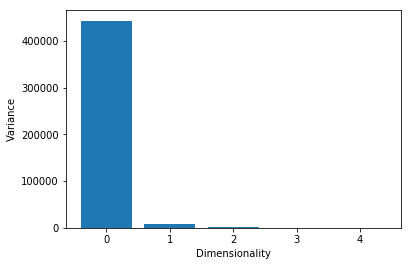

In [43]:
# a) For the given labeled data perform PCA 
# and visualize (using bar-plot) the fraction of variance explained by each principle components.

from sklearn.decomposition import PCA

n=5 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

b) Visualize the observations along the first two principle components with colors depending on the label.

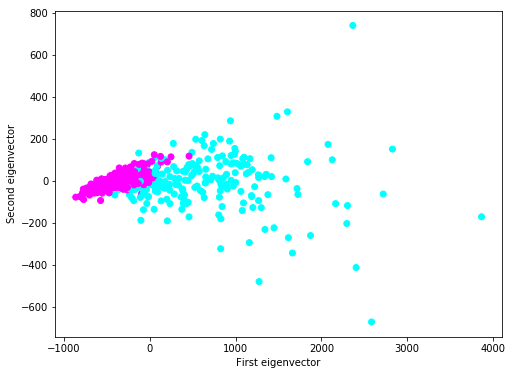

In [44]:
# b) Visualize the observations along the first two principle components with colors depending on the label.

plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()